In [1]:
import pandas as pd

In [2]:
base_path = "/home/forest/data/kaggle/Titan/"

In [3]:
train_file = pd.read_csv(base_path + "train.csv")

In [4]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


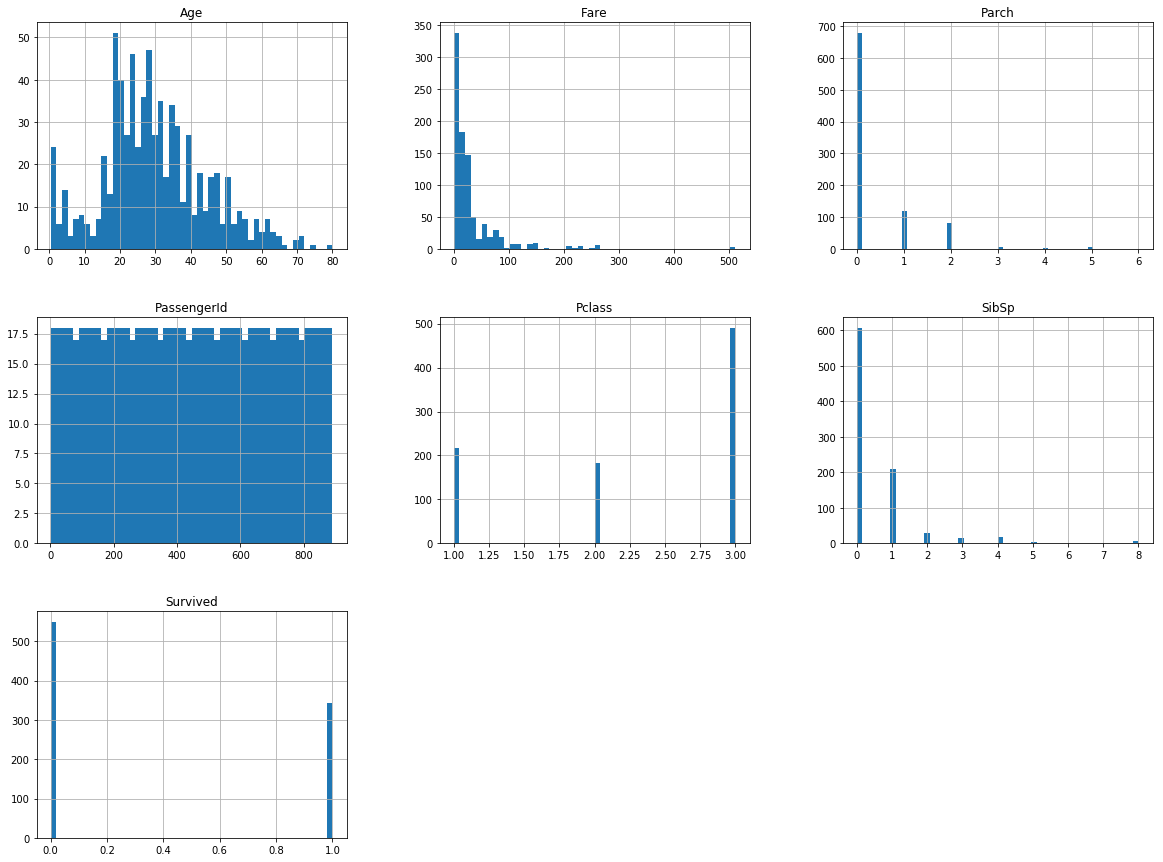

In [9]:
import matplotlib.pyplot as plt
train_file.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix = train_file.corr()

In [11]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66c96f4c88>,
      dtype=object)

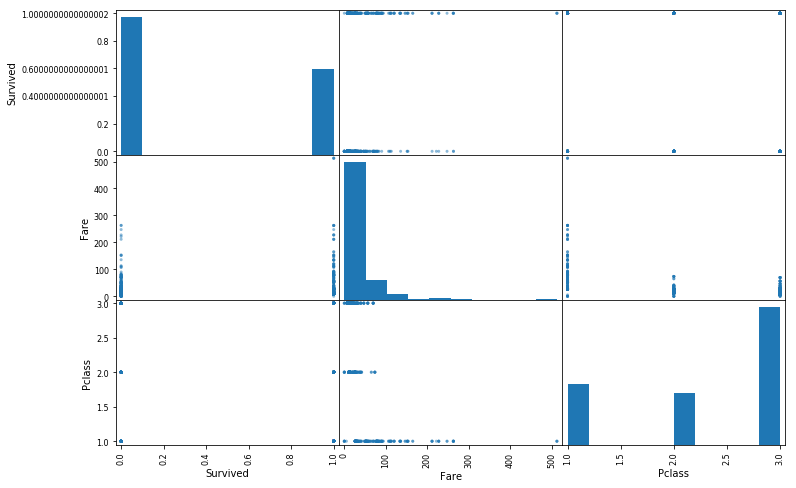

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Pclass"]
scatter_matrix(train_file[attributes], figsize=(12, 8))

[0, 3, 0, 1]

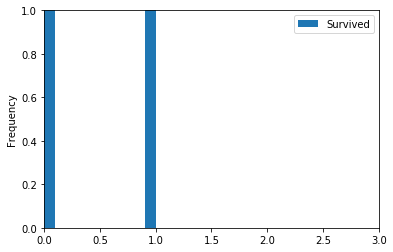

In [21]:
train_file.plot(kind="hist", x="Pclass", y="Survived")
plt.axis([0, 3, 0, 1])

In [27]:
Pclass = train_file["Pclass"]
Pclass_array = Pclass.values

In [28]:
Survived = train_file["Survived"]
Survived_array = Survived.values

In [36]:
import numpy as np

In [37]:
np.mean(Survived_array[Pclass_array == 3])

0.24236252545824846

In [38]:
np.mean(Survived_array[Pclass_array == 1])

0.6296296296296297

In [39]:
np.mean(Survived_array[Pclass_array == 2])

0.47282608695652173

In [40]:
Sex = train_file["Sex"]
Sex_array = Sex.values

In [49]:
np.mean(Survived_array[Sex_array == 'male'])

0.18890814558058924

In [50]:
np.mean(Survived_array[Sex_array == 'female'])

0.7420382165605095

In [56]:
female = train_file.loc[train_file['Sex'] == 'female']
male = train_file.loc[train_file['Sex'] == 'male']

In [60]:
nosurv_female = female.loc[female['Survived'] == 0]
surv_male = male.loc[male['Survived'] == 1]

In [72]:
nosurv_male = male.loc[male['Survived'] == 0]

In [74]:
nosurv_adultmale = nosurv_male.loc[nosurv_male['Age'] >15]

In [77]:
nosurv_youngmale = nosurv_adultmale.loc[nosurv_adultmale['Age'] < 50]

In [79]:
nosurv_pooryoungmale = nosurv_youngmale.loc[nosurv_youngmale['Pclass'] != 1]

In [81]:
nosurv_pooryoungmale_parch = nosurv_pooryoungmale.loc[nosurv_pooryoungmale['Parch'] != 0]

In [87]:
nosurv_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C


In [82]:
nosurv_pooryoungmale_parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S


In [139]:
def tree(var, a):
    tree_depth = len(a)
    for index in range(tree_depth):
        if a[index] == "female":
            var = var.loc[var['Sex'] == "female"]
        if a[index] == "male":
            var = var.loc[var['Sex'] == "male"]
        if a[index] == "surv":
            var = var.loc[var['Survived'] == 1]
        if a[index] == "norsurv":
            var = var.loc[var['Survived'] == 0]
        if a[index] == "adult":
            var = var.loc[var['Age'] > 15]  
        if a[index] == "child":
            var = var.loc[var['Age'] < 16] 
        if a[index] == "young":
            var = var.loc[var['Age'] < 50] 
        if a[index] == "old":
            var = var.loc[var['Age'] > 49]
        if a[index] == "fclass":
            var = var.loc[var['Pclass'] == 1] 
        if a[index] == "lclass":
            var = var.loc[var['lclass'] != 1] 
        if a[index] == "bro_sis":
            var = var.loc[var['SibSp'] != 0] 
        if a[index] == "Pa_ch":
            var = var.loc[var['Parch'] != 0] 
        if a[index] == "noPa_ch":
            var = var.loc[var['Parch'] == 0] 
    return var

In [129]:
bro_par_girl = tree(train_file, ["norsurv", "female", "bro_sis", "Pa_ch"])

In [131]:
bro_par_girl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 24 to 888
Data columns (total 12 columns):
PassengerId    30 non-null int64
Survived       30 non-null int64
Pclass         30 non-null int64
Name           30 non-null object
Sex            30 non-null object
Age            23 non-null float64
SibSp          30 non-null int64
Parch          30 non-null int64
Ticket         30 non-null object
Fare           30 non-null float64
Cabin          3 non-null object
Embarked       30 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ KB


In [135]:
par_littlegirl = tree(train_file, ["norsurv", "female", "Pa_ch", "child"])

In [136]:
littlegirl = tree(train_file, ["norsurv", "female",  "child"])

In [140]:
nopar_littlegirl = tree(train_file, ["norsurv", "female", "noPa_ch", "child"])

In [141]:
nopar_littlegirl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
